                               Unsupervised Learning - Aadish Agrawal

Comments- Overall your approach to the problem is correct and you attempted all the steps requested in the problem statement. In fact you excelled in the following areas. Areas performed well: 1. EDA: Understanding different attributes using Bi-variate and Uni-variate analysis are very detailed with supporting inferences 2. Checking the presence of outliers, missing values and Treatment of both have attempted very well without loosing too much of data and also provided supporting inferences. 3. Comparison of accuracy using SVM and NB models with and without PCA data is an appreciated attempt. 4. Implementation of SCREE plot to choose the optimal number of PC components that explains >95% of variance is done well as a part of PCA implementation. Areas of Focus: 1. Following step as a part of Q4. is missing. "do cross validation to find the accuracy and compare both models followed by concluding the best performing model. "

                                Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("vehicle.csv")
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

                      Descriptive analysis of dataset

Attributes                   Min-Max                Median

compactness                  73-119                  93
circularity                  33-59                   44
distance_circularity         40-112                  80
radius_ratio                 104-333                 167
pr.axis_aspect_ratio         47-138                  61 
max.length_aspect_ratio      2-55                     8
scatter_ratio                112-265                 157
elongatedness                26-61                   43
pr.axis_rectangularity       17-29                   20
max.length_rectangularity    118-188                 146
scaled_variance              130-320                 179   
scaled_variance.1            184-1018                363.5
scaled_radius_of_gyration    109-268                 173.5
scaled_radius_of_gyration.1  59-135                  71.5
skewness_about               0-22                    6
skewness_about.1             0-41                    11
skewness_about.2             176-206                 188
hollows_ratio                181-211                 197

In [3]:
df.shape

(846, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
df.describe(include = "all")

compactness  circularity  distance_circularity  radius_ratio  \
count    846.000000   841.000000            842.000000    840.000000   
unique          NaN          NaN                   NaN           NaN   
top             NaN          NaN                   NaN           NaN   
freq            NaN          NaN                   NaN           NaN   
mean      93.678487    44.828775             82.110451    168.888095   
std        8.234474     6.152172             15.778292     33.520198   
min       73.000000    33.000000             40.000000    104.000000   
25%       87.000000    40.000000             70.000000    141.000000   
50%       93.000000    44.000000             80.000000    167.000000   
75%      100.000000    49.000000             98.000000    195.000000   
max      119.000000    59.000000            112.000000    333.000000   

        pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count             844.000000               846.000000     845.000000   
unique                   NaN                      NaN            NaN   
top                      NaN                      NaN            NaN   
freq                     NaN                      NaN            NaN   
mean               61.678910                 8.567376     168.901775   
std                 7.891463                 4.601217      33.214848   
min                47.000000                 2.000000     112.000000   
25%                57.000000                 7.000000     147.000000   
50%                61.000000                 8.000000     157.000000   
75%                65.000000                10.000000     198.000000   
max               138.000000                55.000000     265.000000   

        elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      845.000000              843.000000                 846.000000   
unique            NaN                     NaN                        NaN   
top               NaN                     NaN                        NaN   
freq              NaN                     NaN                        NaN   
mean        40.933728               20.582444                 147.998818   
std          7.816186                2.592933                  14.515652   
min         26.000000               17.000000                 118.000000   
25%         33.000000               19.000000                 137.000000   
50%         43.000000               20.000000                 146.000000   
75%         46.000000               23.000000                 159.000000   
max         61.000000               29.000000                 188.000000   

        scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count        843.000000         844.000000                 844.000000   
unique              NaN                NaN                        NaN   
top                 NaN                NaN                        NaN   
freq                NaN                NaN                        NaN   
mean         188.631079         439.494076                 174.709716   
std           31.411004         176.666903                  32.584808   
min          130.000000         184.000000                 109.000000   
25%          167.000000         318.000000                 149.000000   
50%          179.000000         363.500000                 173.500000   
75%          217.000000         587.000000                 198.000000   
max          320.000000        1018.000000                 268.000000   

        scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                    842.000000      840.000000        845.000000   
unique                          NaN             NaN               NaN   
top                             NaN             NaN               NaN   
freq                            NaN             NaN               NaN   
mean                      72.447743        6.364286         12.602367   
std                        7.486190        4.92064

                         Visual analysis of dataset

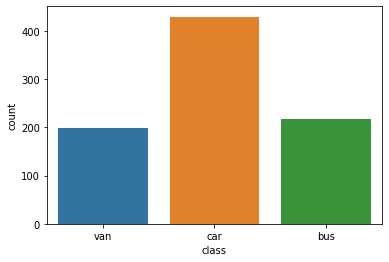

In [6]:
#Car has higest frequency among different class of vehicle
sns.countplot(df['class'])

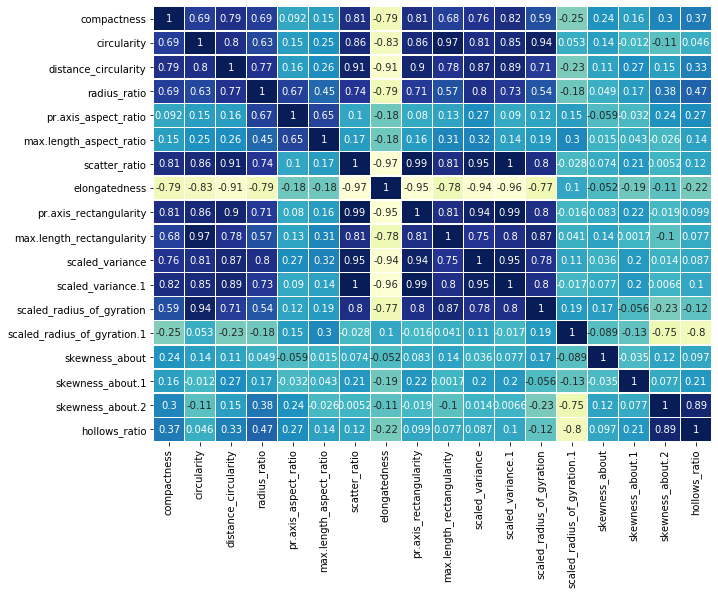

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


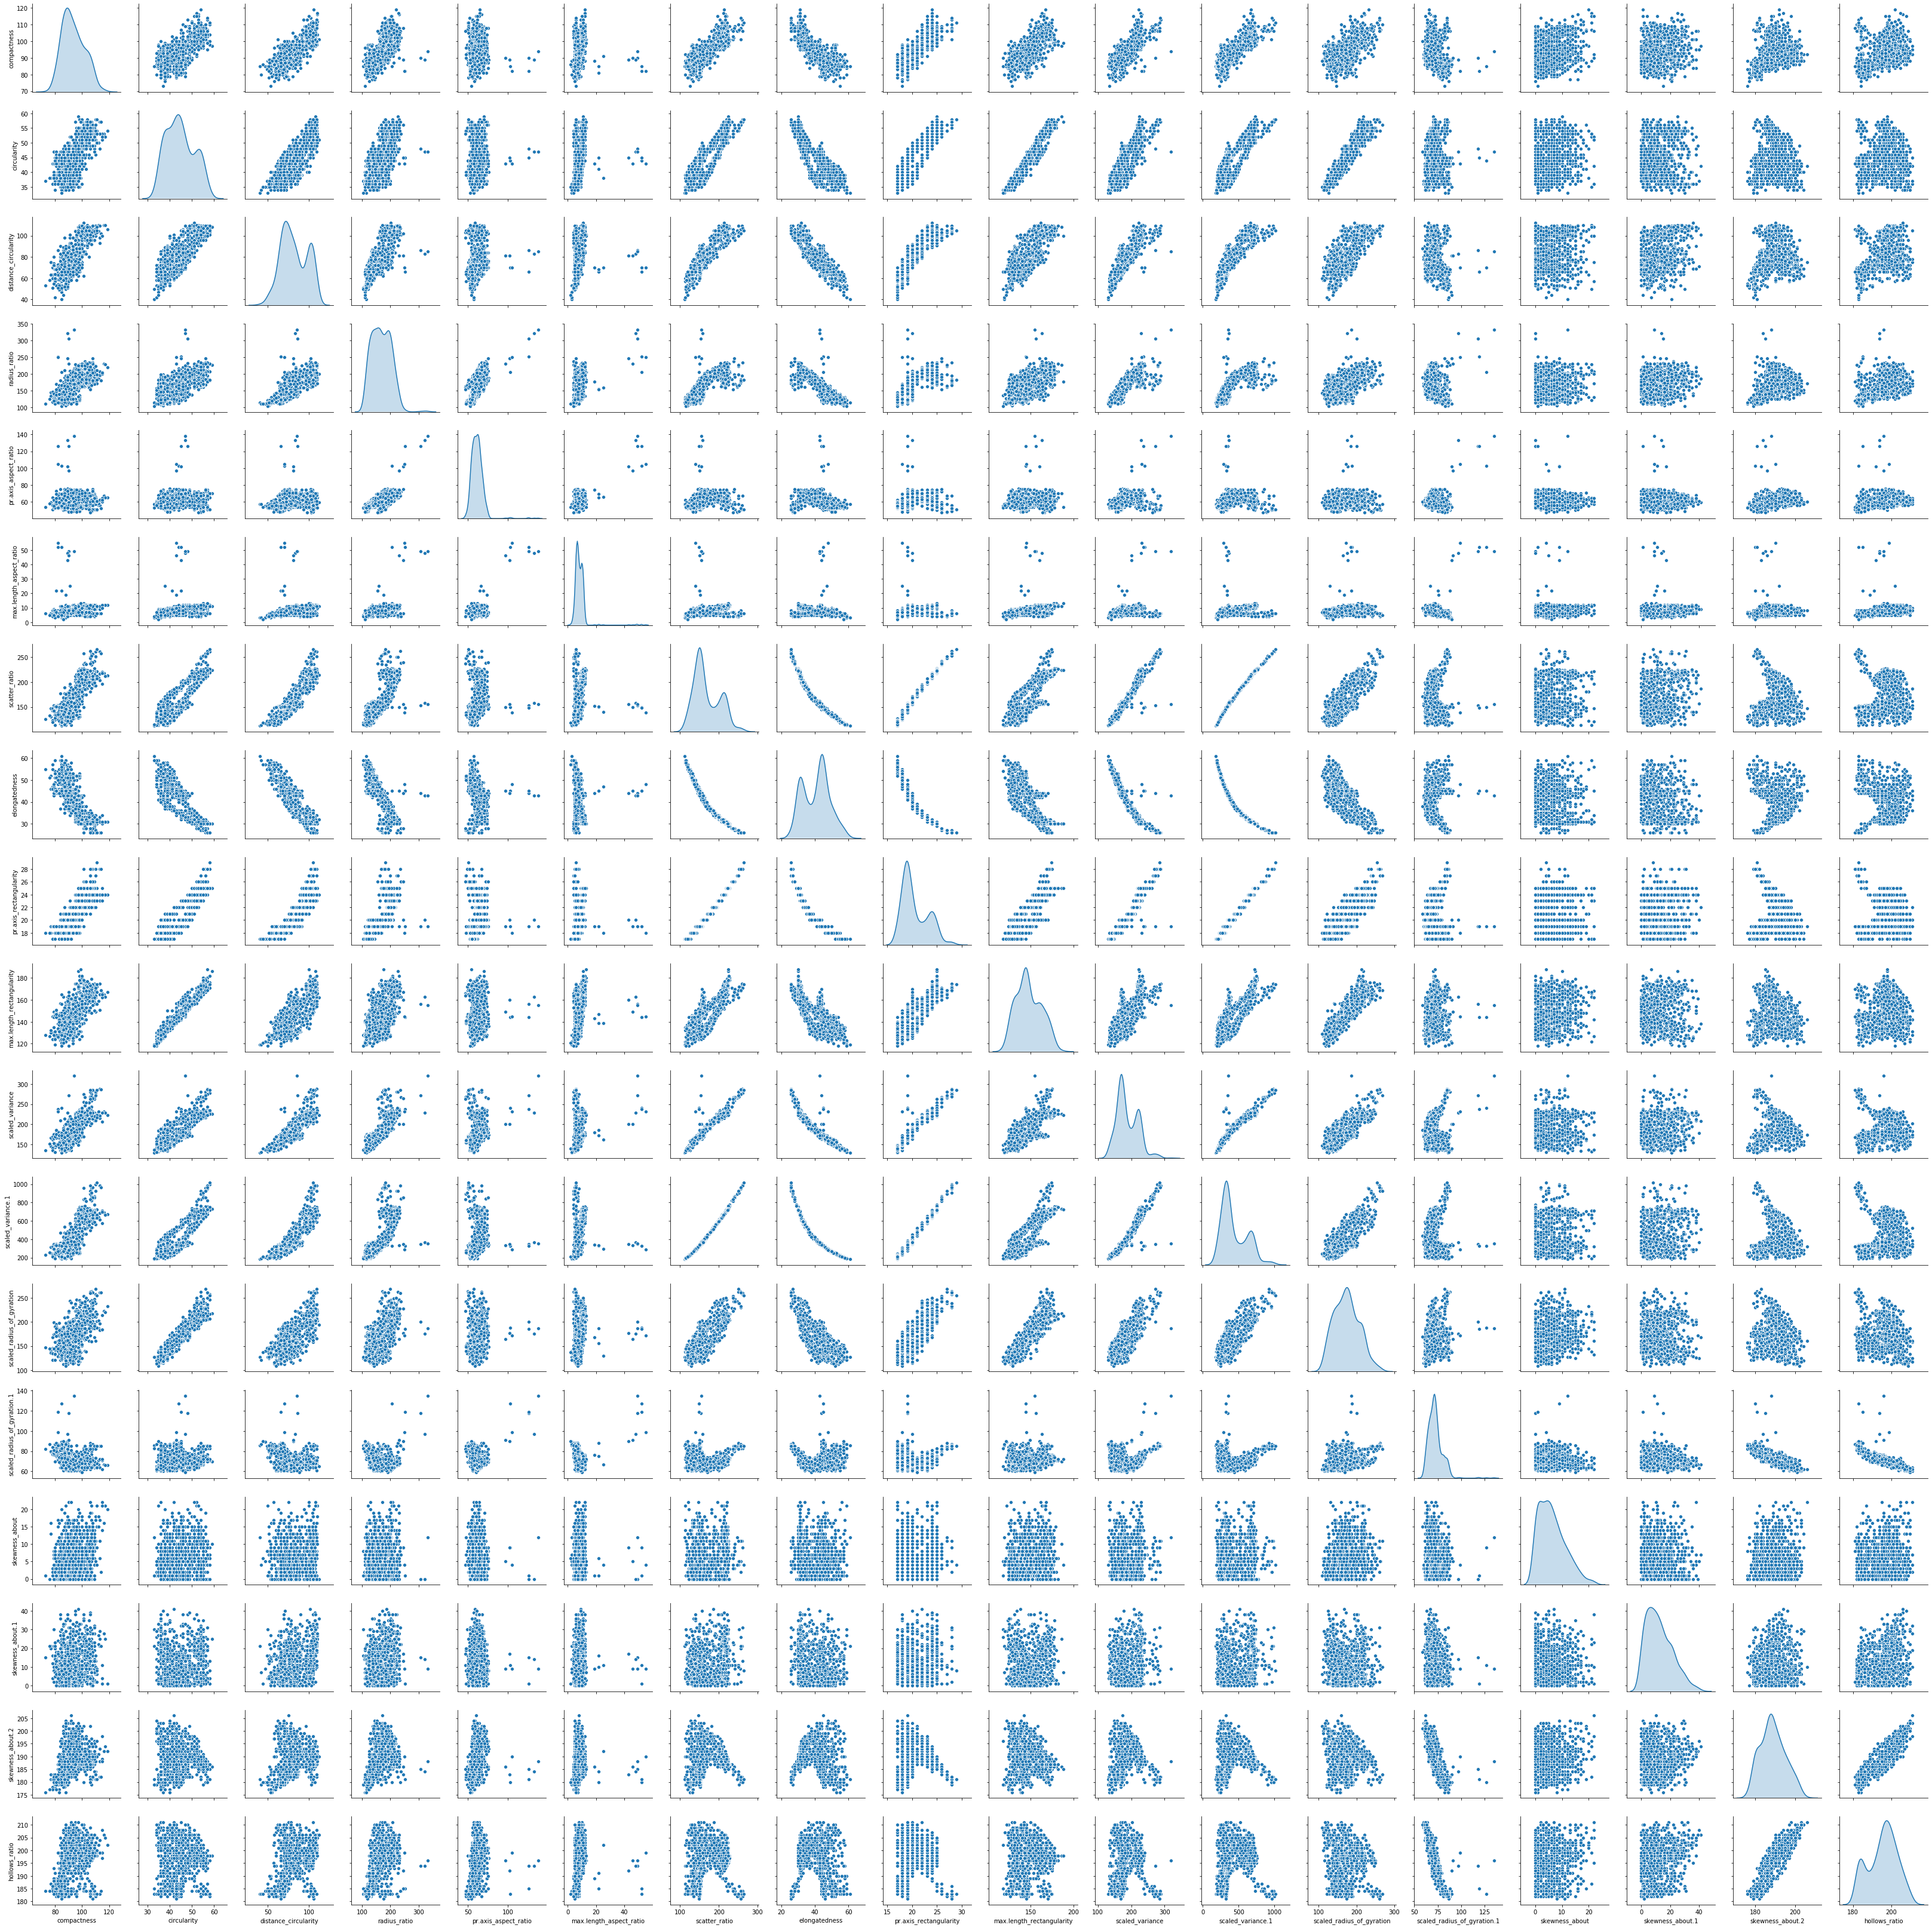

In [8]:
sns.pairplot(df,diag_kind = 'kde')

Looking into correlation heatmap and pairplot, it came to notice that attributes of datasets are highly correlated with each other. Thus, here we can use Principal Component Analysis(feature extraction) in order to get new variables(extracting from highly correlated old variables) which will be independent of each other and lesser in dimensions.

                               checking Duplicates, missing value & Outliers

In [9]:
for i in df.columns:
    print(i)
    print(df[df[i].isna() == True].count())

compactness
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
circularity
compactness                    5
circularity                    0
distance_circularity           4
radius_ratio                   5
pr.axis_aspect_ratio           5
max.length_aspect_ratio        5
scatter_ratio                  5
elongatedness                  5
pr.axis_rectangularity         5
max.length_rectangularity      5
scaled

In [10]:
df_new = df.iloc[:,:-1]
cols = df_new.columns


In [11]:
#Since it has multiple missing value we will be replacing it by median value

median_filler = lambda x: x.fillna(x.median())
df_new = df_new.apply(median_filler, axis = 0)


In [12]:
for i in cols:
    df_new[i] = df_new[i].astype('float64')

In [13]:
df_new['class'] = df['class']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [14]:
for i in df_new.columns:
    print(i)
    print(df_new[df_new[i].isna() == True].count())

compactness
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
circularity
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled

In [15]:
dups = df_new.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_new[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [16]:
for i in df.columns:
    print(i)
    print(df_new[df_new[i].isnull() == True].count())

compactness
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
circularity
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled

dtype: int64
skewness_about
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
skewness_about.1
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectang

Attributes                   Min-Max(range)          Median                updated range

compactness                  73-119                  93                        -
circularity                  33-59                   44                        -
distance_circularity         40-112                  80                        -
radius_ratio                 104-333                 167                      104-231
pr.axis_aspect_ratio         47-138                  61                       47-75
max.length_aspect_ratio      2-55                     8                       2-13 
scatter_ratio                112-265                 157                       -
elongatedness                26-61                   43                        -
pr.axis_rectangularity       17-29                   20                        -
max.length_rectangularity    118-188                 146                       -
scaled_variance              130-320                 179                      130-235 
scaled_variance.1            184-1018                363.5                    184-748
scaled_radius_of_gyration    109-268                 173.5                     -
scaled_radius_of_gyration.1  59-135                  71.5                     59-88
skewness_about               0-22                    6                        0-18
skewness_about.1             0-41                    11                       0-30
skewness_about.2             176-206                 188                       -
hollows_ratio                181-211                 197                       -

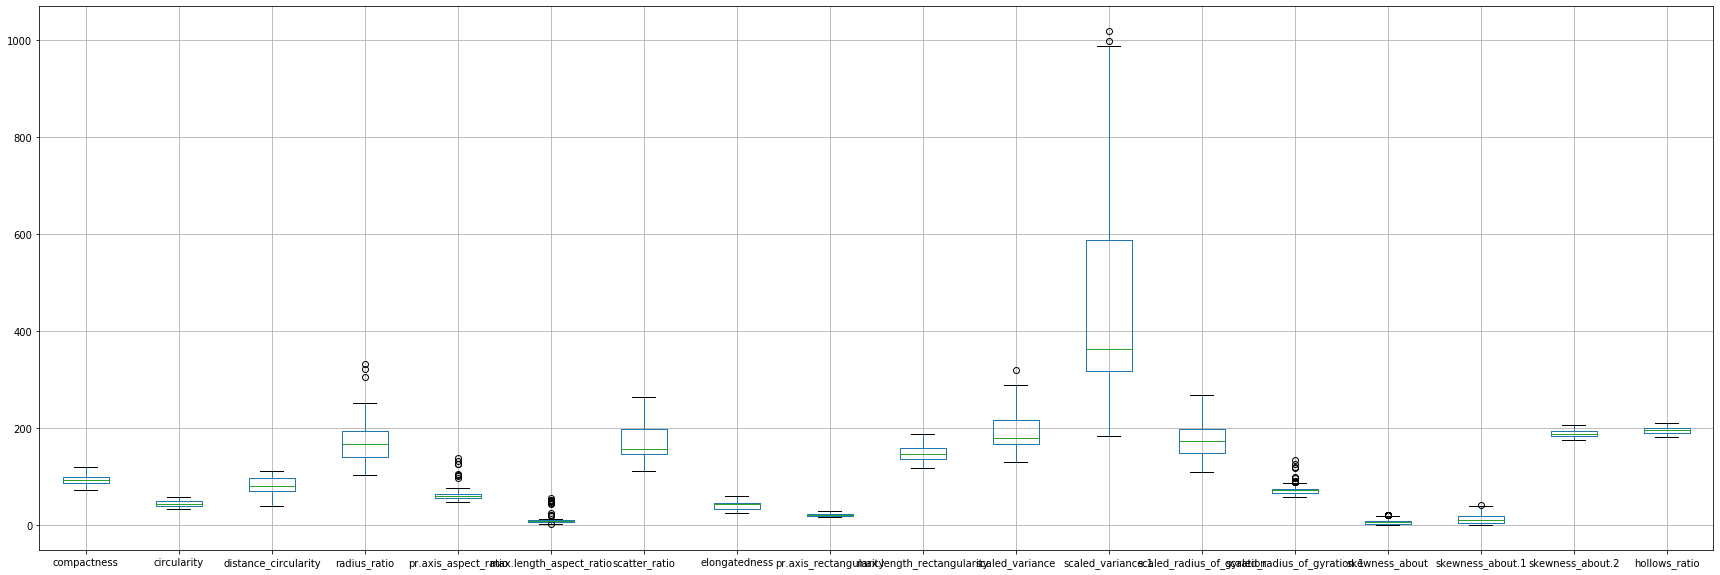

In [17]:
df_new.boxplot(figsize=(30,10))

In [18]:
#dataset has few outliers in the listed attributes - radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,
#scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

#Radius ratio
pd.crosstab(df_new['radius_ratio'], df_new['class'])

class         bus  car  van
radius_ratio               
104.0           0    1    0
105.0           0    0    1
109.0           0    0    1
110.0           0    1    2
111.0           0    1    3
112.0           0    0    1
113.0           2    0    2
114.0           0    1    3
115.0           0    2    2
116.0           2    3    2
117.0           0    1    3
118.0           1    1    0
119.0           1    2    2
120.0           7    1    1
121.0           2    3    3
122.0           3    2    0
123.0           6    2    2
124.0           1    0    2
125.0           5    2    6
126.0           3    1    4
127.0           1    5    1
128.0           4    2    0
129.0           1    2    2
130.0           5    5    2
131.0           0    2    4
132.0           1    3    1
133.0           1    3    7
134.0           0    1    2
135.0           1    2    2
136.0           1    5    5
...           ...  ...  ...
211.0           0    8    0
212.0           0    5    0
213.0           1    7    0
214.0           0    2    0
215.0           0    5    0
216.0           1    2    0
217.0           0    1    0
218.0           0    2    0
219.0           1    5    0
220.0           0    4    0
221.0           0    4    0
222.0           0    5    0
223.0           1    2    0
224.0           0    2    0
225.0           0    4    0
226.0           1    0    0
227.0           1    1    0
228.0           0    5    0
230.0           0    4    0
231.0           0    5    1
232.0           0    1    0
234.0           0    2    0
235.0           1    0    0
238.0           1    0    0
246.0           1    0    1
250.0           0    0    1
252.0           1    0    0
306.0           0    0    1
322.0           0    0    1
333.0           0    0    1

[134 rows x 3 columns]

In [19]:
# We could see from 231 point onward we have similar pattern, and also few points. We can club the levels together
df_new['radius_ratio'] = np.where(df_new['radius_ratio'] >231, 231, df_new['radius_ratio'])

In [20]:
pd.crosstab(df_new['pr.axis_aspect_ratio'], df_new['class'])

class                 bus  car  van
pr.axis_aspect_ratio               
47.0                    2    0    0
48.0                    1    0    3
49.0                    1    0    2
50.0                    3    1    1
51.0                    7    1    3
52.0                    3    2    9
53.0                    8   13    6
54.0                   12   16   10
55.0                    7   19   11
56.0                   13   28   16
57.0                    7   29    8
58.0                    4   22   17
59.0                    6   43   15
60.0                    5   33    8
61.0                    9   27    8
62.0                    6   42   10
63.0                    4   28   13
64.0                   17   30   22
65.0                   13   20    5
66.0                   10   17   10
67.0                    7   16    5
68.0                   12   15    7
69.0                   13   10    2
70.0                   10    7    1
71.0                   10    5    0
72.0                    7    2    1
73.0                    6    1    0
74.0                    7    2    0
75.0                    5    0    0
76.0                    1    0    0
97.0                    0    0    1
102.0                   0    0    1
103.0                   1    0    0
105.0                   0    0    1
126.0                   1    0    1
133.0                   0    0    1
138.0                   0    0    1

In [21]:
# We could see from 75 point onward we have similar pattern, and also few points. We can club the levels together
df_new['pr.axis_aspect_ratio'] = np.where(df_new['pr.axis_aspect_ratio'] >75, 75, df_new['pr.axis_aspect_ratio'])

In [22]:
pd.crosstab(df_new['max.length_aspect_ratio'], df_new['class'])

class                    bus  car  van
max.length_aspect_ratio               
2.0                        0    0    1
3.0                        0    2    2
4.0                        7    9    2
5.0                       26   15   10
6.0                       78   35   19
7.0                       80   62   26
8.0                       22   58   33
9.0                        0   60   34
10.0                       0   80   32
11.0                       0   78   30
12.0                       0   27    3
13.0                       0    3    0
19.0                       1    0    0
22.0                       2    0    0
25.0                       0    0    1
43.0                       0    0    1
46.0                       0    0    1
48.0                       0    0    1
49.0                       0    0    2
52.0                       2    0    0
55.0                       0    0    1

In [23]:
# We could see from 13 point onward we have similar pattern, and also few points. We can club the levels together
df_new['max.length_aspect_ratio'] = np.where(df_new['max.length_aspect_ratio'] >13, 13, df_new['max.length_aspect_ratio'])

In [24]:
pd.crosstab(df_new['scaled_variance'], df_new['class'])

class            bus  car  van
scaled_variance               
130.0              0    1    0
131.0              0    1    0
132.0              0    1    0
134.0              0    0    1
135.0              0    3    3
136.0              0    1    1
137.0              0    3    3
138.0              0    0    3
139.0              0    1    3
140.0              0    0    4
141.0              0    2    3
142.0              0    1    3
143.0              0    1    2
144.0              0    2    1
145.0              0    2    2
146.0              0    2    1
147.0              0    3    3
148.0              0    4    4
149.0              0    1    2
150.0              0    1    2
151.0              0    5    0
152.0              0    5    0
153.0              0    1    2
154.0              0    3    4
155.0              0    4    2
156.0              0    0    5
157.0              0    0    5
158.0              0    4    4
159.0              0    2    8
160.0              0    1    6
...              ...  ...  ...
231.0              1    8    1
232.0              2    9    0
234.0              1    4    0
235.0              0    2    0
236.0              0    1    0
237.0              1    1    0
238.0              1    2    0
240.0              1    0    0
241.0              1    1    0
243.0              1    0    0
246.0              1    0    0
247.0              1    0    0
254.0              2    0    0
256.0              1    0    0
258.0              1    0    0
262.0              1    0    0
263.0              1    0    0
264.0              1    0    0
265.0              1    0    0
266.0              1    0    0
267.0              2    0    0
269.0              2    0    0
272.0              1    0    1
275.0              2    0    0
278.0              1    0    0
280.0              3    0    0
285.0              3    0    0
287.0              1    0    0
288.0              1    0    0
320.0              0    0    1

[128 rows x 3 columns]

In [60]:
# We could see from 235 point onward we have similar pattern, and also few points. We can club the levels together
df_new['scaled_variance'] = np.where(df_new['scaled_variance'] >235, 235, df_new['scaled_variance'])

In [26]:
pd.crosstab(df_new['scaled_variance.1'], df_new['class'])

class              bus  car  van
scaled_variance.1               
184.0                0    1    0
191.0                0    1    0
192.0                0    1    0
193.0                0    1    0
194.0                0    0    1
195.0                0    0    1
196.0                0    1    1
197.0                0    1    0
200.0                0    0    1
203.0                0    0    2
204.0                0    0    2
205.0                0    0    1
206.0                0    0    1
207.0                0    0    2
208.0                0    0    2
209.0                0    1    2
211.0                0    0    1
212.0                0    0    2
213.0                0    0    1
216.0                0    1    0
218.0                0    0    1
219.0                0    1    1
220.0                0    1    0
221.0                0    1    1
222.0                0    0    1
223.0                0    0    2
224.0                0    1    0
225.0                0    0    2
227.0                0    1    1
229.0                0    2    0
...                ...  ...  ...
741.0                0    1    0
748.0                0    2    0
752.0                0    1    0
756.0                0    1    0
757.0                0    1    0
766.0                1    0    0
776.0                1    0    0
816.0                1    0    0
822.0                1    0    0
833.0                1    0    0
838.0                1    0    0
844.0                1    0    0
855.0                1    0    0
857.0                1    0    0
866.0                1    0    0
870.0                1    0    0
891.0                1    0    0
892.0                1    0    0
904.0                1    0    0
923.0                1    0    0
928.0                2    0    0
954.0                1    0    0
956.0                1    0    0
957.0                1    0    0
966.0                1    0    0
968.0                1    0    0
982.0                1    0    0
987.0                1    0    0
998.0                1    0    0
1018.0               1    0    0

[423 rows x 3 columns]

In [61]:
# We could see from 748 point onward we have similar pattern, and also few points. We can club the levels together
df_new['scaled_variance.1'] = np.where(df_new['scaled_variance.1'] >748, 748, df_new['scaled_variance.1'])

In [28]:
pd.crosstab(df_new['scaled_radius_of_gyration.1'], df_new['class'])

class                        bus  car  van
scaled_radius_of_gyration.1               
59.0                           0    1    0
60.0                           0    2    0
61.0                           0    9    2
62.0                           0   12    6
63.0                           0   16    8
64.0                           0   25   13
65.0                           3   20    8
66.0                           4   28    8
67.0                           5   35   13
68.0                           7   27    5
69.0                          15   20    9
70.0                           9   34    9
71.0                          13   43   12
71.5                           1    3    0
72.0                          16   45   14
73.0                           8   27   11
74.0                          12   29   12
75.0                          11   11   16
76.0                           7    8   10
77.0                           8    5    7
78.0                           7    2    8
79.0                           5    3    3
80.0                          11    4    3
81.0                          14    3    2
82.0                          11    4    2
83.0                           9    4    0
84.0                           5    1    1
85.0                          19    1    4
86.0                           6    3    3
87.0                           6    4    1
88.0                           4    0    1
89.0                           0    0    1
90.0                           0    0    2
91.0                           0    0    1
97.0                           0    0    1
99.0                           0    0    1
118.0                          0    0    1
119.0                          1    0    0
127.0                          1    0    0
135.0                          0    0    1

In [29]:
# We could see from 88 point onward we have similar pattern, and also few points. We can club the levels together
df_new['scaled_radius_of_gyration.1'] = np.where(df_new['scaled_radius_of_gyration.1'] >88, 88, df_new['scaled_radius_of_gyration.1'])

In [30]:
pd.crosstab(df_new['skewness_about'], df_new['class'])

class           bus  car  van
skewness_about               
0.0              19   44   14
1.0              22   38   21
2.0              19   29   15
3.0              17   26   13
4.0              28   25   17
5.0              22   35   14
6.0              29   29   13
7.0              18   22   20
8.0              15   19   13
9.0              14   22   10
10.0              6   21    9
11.0              4   20    7
12.0              2   18   10
13.0              2   18    6
14.0              0   14    4
15.0              0   15    4
16.0              0   10    1
17.0              1    5    5
18.0              0    4    2
19.0              0    3    1
20.0              0    3    0
21.0              0    5    0
22.0              0    4    0

In [31]:
# We could see from 18 point onward we have similar pattern, and also few points. We can club the levels together
df_new['skewness_about'] = np.where(df_new['skewness_about'] >18, 18, df_new['skewness_about'])

In [32]:
pd.crosstab(df_new['skewness_about.1'], df_new['class'])

class             bus  car  van
skewness_about.1               
0.0                 9   11   10
1.0                15   16    7
2.0                 9   19    9
3.0                 8   14   10
4.0                13   18   10
5.0                 7   20    9
6.0                11   14   12
7.0                12   16   16
8.0                14    8   10
9.0                 8   17   15
10.0                8   12    9
11.0               19   19    9
12.0               11    9    8
13.0                8   12   10
14.0               16   12   10
15.0                4   12    7
16.0                7   15    9
17.0                8    4    8
18.0                2   12    3
19.0                6   11    3
20.0                4   15    3
21.0                3   22    4
22.0                5   14    1
23.0                3   12    4
24.0                0   13    0
25.0                1   10    0
26.0                3    5    1
27.0                1    5    1
28.0                1   12    0
29.0                0   11    1
30.0                1    7    0
31.0                1    4    0
32.0                0    6    0
33.0                0    5    0
34.0                0    1    0
35.0                0    4    0
36.0                0    3    0
38.0                0    6    0
39.0                0    1    0
40.0                0    1    0
41.0                0    1    0

In [33]:
# We could see from 30 point onward we have similar pattern, and also few points. We can club the levels together
df_new['skewness_about.1'] = np.where(df_new['skewness_about.1'] >30, 30, df_new['skewness_about.1'])

In [34]:
df_new.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  75.0                     13.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            235.0              325.0                      188.0   
5            235.0              748.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         88.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0          197.0   van  
1             189.0          199.0   van  
2             188.0          196.0   car  
3             199.0          207.0   van  
4             180.0          183

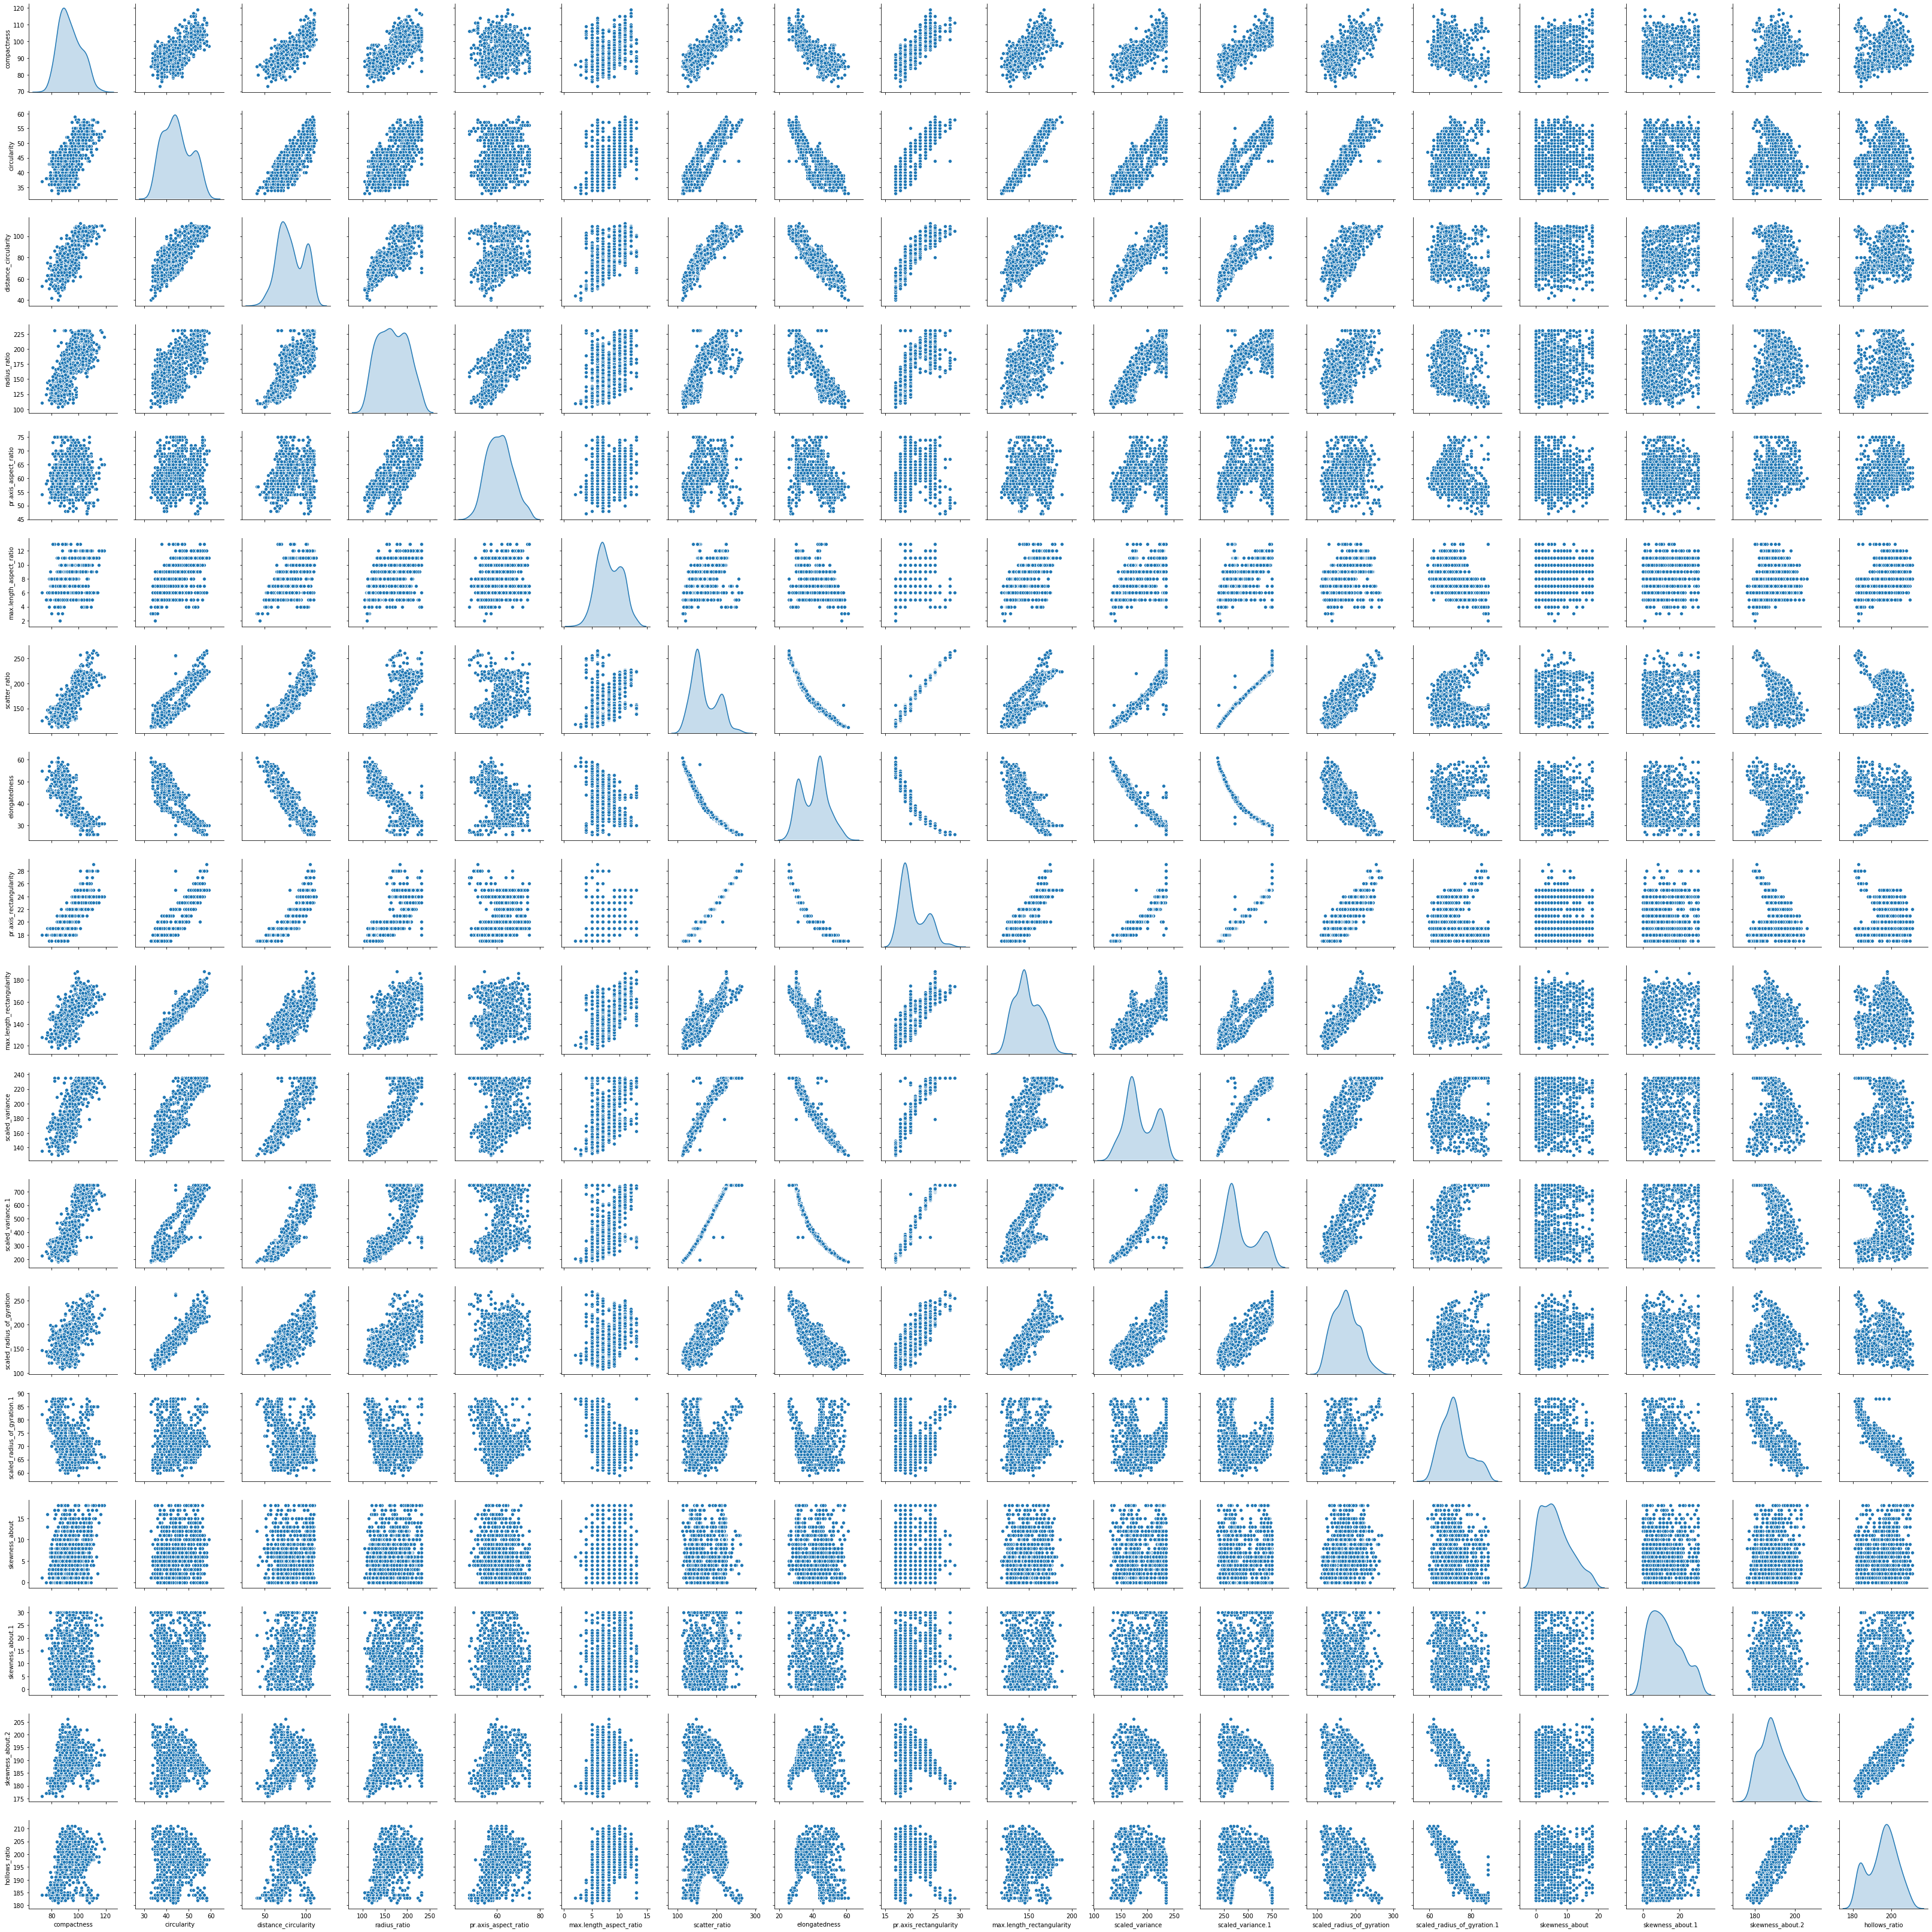

In [62]:
sns.pairplot(df_new,diag_kind = 'kde')

                      Scaling dataset & Removing Unwanted Columns for applying PCA

In [35]:
data_new = df_new.drop(['class'], axis =1)
y = df_new['class']

data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  75.0                     13.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            235.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         88.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [36]:
data_new = data_new.apply(zscore)
data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.297221   
1    -0.325470    -0.623732              0.120741     -0.854787   
2     1.254193     0.844303              1.519141      1.262417   
3    -0.082445    -0.623732             -0.006386     -0.294351   
4    -1.054545    -0.134387             -0.769150      1.137876   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.858455                 0.844559      -0.207598   
1             -0.743464                 0.379997      -0.599423   
2              0.817687                 0.844559       1.148719   
3              0.297304                 0.379997      -0.750125   
4              2.378838                 2.238246      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397768          -0.336384                   0.285705   
1        -0.608879          -0.632709                  -0.513630   
2         1.255939           1.211764                   1.392477   
3        -0.960732          -0.759706                  -1.466683   
4         1.678162          -0.662947                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.343581       -0.065694          0.421169   
1                    -0.036319        0.563481          0.185826   
2                     0.117312        1.612107         -0.402531   
3                    -1.418998       -0.065694         -0.284859   
4                     2.421775        0.563481         -0.167188   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

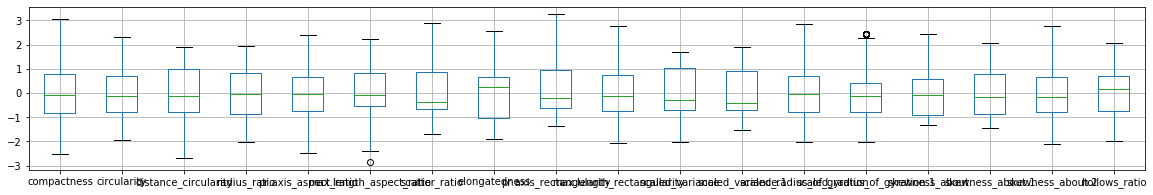

In [37]:
#most of the outliers has been removed
data_new.boxplot(figsize=(20,3))

     Using Covariance matrix to find PCA components and get appropriate number of PCA variable using elbow                                                      method

In [38]:
#step1: Compute covariance matrix
cov_matrix = np.cov(data_new.T)
print("covariance matrix \n", cov_matrix)

covariance matrix 
 [[ 1.00118343  0.68569786  0.79086299  0.72130258  0.17111123  0.45664566
   0.81358214 -0.78968322  0.81465658  0.67694334  0.7751156   0.82062913
   0.58593517 -0.26422946  0.23129425  0.15871319  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.64029122  0.19978735  0.53905943
   0.8489411  -0.82244387  0.84439802  0.96245572  0.81625196  0.84762944
   0.92691166  0.05561206  0.14455648 -0.00809327 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79635558  0.23177317  0.63218954
   0.90614687 -0.9123854   0.89408198  0.77544391  0.89717658  0.90668526
   0.70660663 -0.24831814  0.11261647  0.26246164  0.14627113  0.33312625]
 [ 0.72130258  0.64029122  0.79635558  1.00118343  0.67381335  0.49011075
   0.76709049 -0.8237716   0.74067129  0.58354416  0.83712907  0.78256403
   0.55204325 -0.34896557  0.05097712  0.17844548  0.40485448  0.49397304]
 [ 0.17111123  0.19978735  0.23177317  0.67381335  1.00118343  0.20941691
   0.17683755 

In [39]:
#Find Eigen Value and Eigen Vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-2.71229440e-01 -8.49340255e-02 -1.85130595e-01  4.36409513e-02
   1.62914009e-01  1.74920724e-01 -2.54086960e-01  7.54209451e-01
  -3.24763363e-01 -2.24667004e-01  2.14556538e-02  1.94121133e-02
   1.19246893e-01 -1.11505045e-02 -1.42705536e-01 -5.93564291e-03
  -3.08932926e-02  5.50333418e-03]
 [-2.86345953e-01  1.41265347e-01  3.59196996e-02  1.93047950e-01
  -1.24599102e-01  9.75938504e-03  4.02510634e-01  7.74114904e-02
  -3.94184815e-02  9.74969147e-02  1.07581530e-02 -3.11920494e-01
  -7.69253212e-02  5.44778947e-03 -2.43582683e-01 -1.84435084e-01
   4.46881277e-01 -5.18069830e-01]
 [-3.02054035e-01 -4.12104501e-02 -9.31745395e-02 -7.68545875e-02
  -9.05210621e-02  1.16426934e-02 -1.18789458e-01 -3.04896651e-01
  -2.37307762e-01 -1.74339760e-01  8.07346405e-01  1.05850166e-01
  -3.24039749e-02 -1.10413337e-02  1.03613401e-01  3.99034236e-02
   1.16809035e-01 -1.44332052e-02]
 [-2.71671520e-01 -1.90695429e-01  2.65321163e-01 -4.01840840e-02
   1.47212471e-01 -1.

In [40]:
#calculate variance explained and cummulative variance explained by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.33031349  72.53342831  79.1067184   85.54987663  90.25530312
  94.27539247  96.15138777  97.41026878  98.13402904  98.64418515
  98.99226842  99.30183497  99.52042616  99.68610739  99.80334828
  99.90106259  99.97273585 100.        ]


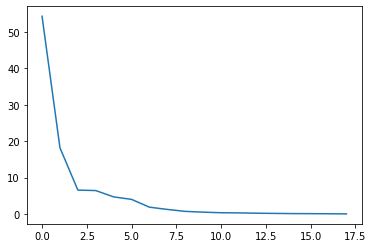

In [41]:
plt.plot(var_exp)

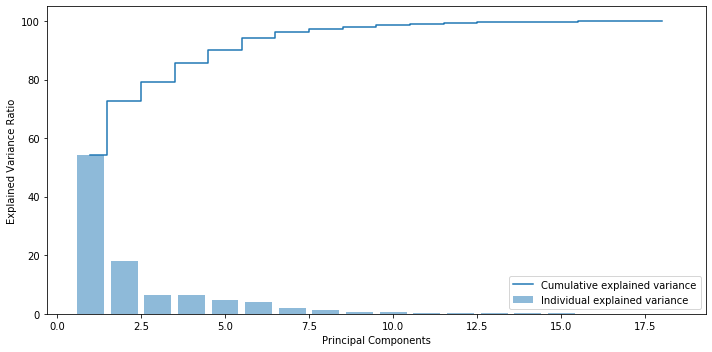

In [42]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Looking into figure we can say 6 principal component explain almost 95% of variance and we can move further with this number

     Using PCA from scikit learn with reduced dimension to find principal component and tranform into new                                                         variables    

In [71]:
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-0.5627371 ,  1.52927086, -3.96465703, ..., -5.16632215,
         3.32036991,  5.00742516],
       [-0.58388318, -0.39067973,  0.25244579, ..., -0.0736084 ,
        -1.11423399,  0.34836617],
       [ 0.37196039,  0.2107632 ,  1.18464396, ...,  0.47770469,
        -2.00411638, -1.31488122],
       [ 1.00391773, -1.13337171, -0.18263915, ...,  1.19096989,
        -0.3507066 , -0.35201144],
       [-0.88911536, -0.60768569,  0.65489597, ..., -1.02701096,
        -0.43524253, -0.05575202],
       [ 1.44368856,  0.16796135,  0.84489743, ..., -0.52978005,
        -0.13327533, -0.44241405]])

In [72]:
print( "PCA COMPONENT \n" ,pca.components_)
print("VARIANCE EXPLAINED \n",pca.explained_variance_ratio_)

PCA COMPONENT 
 [[-0.27122944 -0.28634595 -0.30205403 -0.27167152 -0.09891656 -0.19115422
  -0.30824444  0.30794461 -0.30470048 -0.27737553 -0.30487964 -0.30907599
  -0.2609784   0.04777545 -0.04093035 -0.05898135 -0.04043126 -0.08825793]
 [-0.08493403  0.14126535 -0.04121045 -0.19069543 -0.24038038 -0.09311579
   0.08067709 -0.01818049  0.09297363  0.13159578  0.04518963  0.05955757
   0.2202097   0.49985584 -0.03431652 -0.09277923 -0.50981405 -0.51174189]
 [ 0.04364095  0.19304795 -0.07685459 -0.04018408  0.08718172  0.11116647
  -0.11019223  0.09347401 -0.1077484   0.19880737 -0.1187326  -0.09886139
   0.20495224 -0.06088709  0.55033269 -0.69411557  0.0754136   0.03742672]
 [-0.1851306   0.0359197  -0.09317454  0.26532116  0.64303238 -0.09048348
  -0.03354495 -0.04184383 -0.05941828 -0.01789762  0.06748615 -0.02866485
   0.06042419  0.14344818 -0.53518061 -0.36841577 -0.01323996 -0.07089726]
 [ 0.16291401 -0.1245991  -0.09052106  0.14721247  0.13052141 -0.75585082
   0.12007055 -0.1

In [73]:
pca_data = pd.DataFrame(data_reduced)

In [ ]:
#Dataset with new variable seems to be independent of each other
sns.pairplot(pca_data)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pca_data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

              Using New Principal Component Variables to fit in Different Classification model

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(pca_data,y, random_state = 1)

                                SUPPORT VECTOR CLASSIFIER

In [69]:
#Using SVC model and kernel as rbf- C = 5 is the best fit value with accuracy 93% in test set
from sklearn import svm
list1 = [0.01,0.05,0.1,1,5,10]

In [70]:
for i in list1:
    clf = svm.SVC(gamma = 0.025, C= i, kernel= 'rbf')
    clf.fit(X_train,y_train)
    print("C =",i)
    print("Accuracy on training set for: {:.2f}".format(clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

C = 0.01
Accuracy on training set for: 0.51
Accuracy on test set: 0.50
C = 0.05
Accuracy on training set for: 0.55
Accuracy on test set: 0.57
C = 0.1
Accuracy on training set for: 0.84
Accuracy on test set: 0.84
C = 1
Accuracy on training set for: 0.91
Accuracy on test set: 0.93
C = 5
Accuracy on training set for: 0.94
Accuracy on test set: 0.94
C = 10
Accuracy on training set for: 0.95
Accuracy on test set: 0.93


In [51]:
#Using SVC model and kernel as linear- C = 0.05 is the best fit with accuracy of 82% in test set
for i in list1:
    clf1 = svm.SVC(gamma = 0.025, C= i, kernel= 'linear')
    clf1.fit(X_train,y_train)
    print("C =",i)
    print("Accuracy on training set: {:.2f}".format(clf1.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(clf1.score(X_test, y_test)))

C = 0.01
Accuracy on training set: 0.82
Accuracy on test set: 0.82
C = 0.05
Accuracy on training set: 0.84
Accuracy on test set: 0.82
C = 0.1
Accuracy on training set: 0.83
Accuracy on test set: 0.82
C = 1
Accuracy on training set: 0.84
Accuracy on test set: 0.81
C = 5
Accuracy on training set: 0.83
Accuracy on test set: 0.80
C = 10
Accuracy on training set: 0.83
Accuracy on test set: 0.81


Best Fit SVC Provide 93 % Accuracy on Test Set with Gamma = 0.025, C = 10 & Kernel = RBF

                                   NAIVE BAYES - Accuracy of 78%

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
NB_Model = GaussianNB()
NB_Model.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(NB_Model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(NB_Model.score(X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.78


                                    KNN - Accuracy of 91.98% with K = 3

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
score = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
print("Accuracy on test dataset")
print(score)

Accuracy on test dataset
[0.8679245283018868, 0.8679245283018868, 0.9198113207547169, 0.910377358490566, 0.9009433962264151, 0.9009433962264151, 0.910377358490566, 0.9198113207547169, 0.9056603773584906, 0.8962264150943396, 0.9009433962264151, 0.9009433962264151, 0.9056603773584906, 0.910377358490566, 0.9009433962264151, 0.9056603773584906, 0.9009433962264151, 0.9056603773584906, 0.9056603773584906, 0.9245283018867925, 0.9150943396226415, 0.9245283018867925, 0.9150943396226415, 0.9150943396226415]


                                LOGISTIC REGRESSION - Accuracy 0f 80%

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(LR.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(LR.score(X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.80


/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
